<a href="https://colab.research.google.com/github/Pragya1712/Machine-Learning-Hand-Code/blob/main/Coffee_Roasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Coffee Roasting Classification using two features temprature and duration
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
import matplotlib.pyplot as plt


In [ ]:
# Create dataset for traing
# Best kept duration 12 to 15 mins and temprature 175 and 260 degree celsius
X_train = np.array([[200,12],[190,11], [210, 14], [205, 13],
    [195, 10], [215, 15], [180, 9],  [220, 16]],dtype=np.float32)
Y_train = np.array([[1],[0],[1],[1],[0],[1],[0],[0]], dtype=np.float32) # 1= good roast , 0= bad roast
print(X_train.shape,Y_train.shape)



(8, 2) (8, 1)


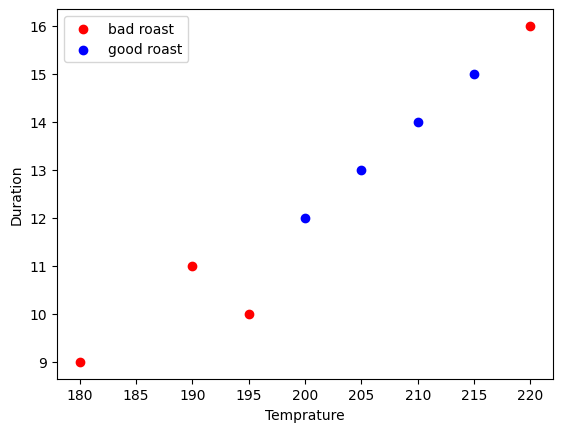

In [ ]:
# plotting
# Plot class 0
plt.scatter(X_train[Y_train[:,0]==0][:,0],X_train[Y_train[:,0]==0][:,1], c='r',label="bad roast")
# Plot class 1
plt.scatter(X_train[Y_train[:,0]==1][:,0],X_train[Y_train[:,0]==1][:,1], c='b',label="good roast")
plt.xlabel("Temprature")
plt.ylabel("Duration")
plt.legend()
plt.show()

In [ ]:
# Normalize Features
norm_1 = Normalization(axis=-1)
norm_1.adapt(X_train)
Xn = norm_1(X_train)
print(Xn)

tf.Tensor(
[[-0.15018785 -0.21821788]
 [-0.9511897  -0.65465367]
 [ 0.650814    0.65465367]
 [ 0.25031307  0.21821788]
 [-0.5506888  -1.0910894 ]
 [ 1.051315    1.0910894 ]
 [-1.7521915  -1.5275252 ]
 [ 1.4518158   1.5275252 ]], shape=(8, 2), dtype=float32)


In [ ]:
# Tile the dataset because we want to increase the dataset and stablizes gradient descent
Xt = np.tile(Xn,(100,1))
Yt = np.tile(Y_train,(100,1))
print(Xt.shape,Yt.shape)

(800, 2) (800, 1)


In [ ]:
# building neural nw
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(units=3,activation='sigmoid',name="layer1"),
    Dense(units=1,activation="sigmoid",name="layer2")

])
model.summary() #

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# check weights and bias
W1,b1 = model.get_layer("layer1").get_weights()
W2,b2 = model.get_layer("layer2").get_weights()
print(f"W1 = {W1.shape}, \n {W1}")
print(f"b1 = {b1.shape}, \n {b1}")
print(f"W2 = {W2.shape}, \n {W2}")
print(f"b2 = {b2.shape}, \n {b2}")

W1 = (2, 3), 
 [[-0.77555764 -0.26715904 -0.63438916]
 [ 0.5825113   0.1071943   1.0897055 ]]
b1 = (3,), 
 [0. 0. 0.]
W2 = (3, 1), 
 [[-0.6090057 ]
 [ 0.7719352 ]
 [-0.06504953]]
b2 = (1,), 
 [0.]


In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)
model.fit(Xt , Yt , epochs=30, verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6848
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6484
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6129
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5727
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5326
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4954
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4628
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4358
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4139
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3964
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3822
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3706
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3611
Epoch 14/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3531
Epoch 15/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3464
Epoch 16/30
25/25 ━

In [ ]:
W1,b1 = model.get_layer("layer1").get_weights()
W2,b2 = model.get_layer("layer2").get_weights()
print(f"W1 = {W1}")
print(f"b1 = {b1}")
print(f"W2 = {W2}")
print(f"b2 = {b2}")

W1 = [[-3.9523206  2.1005375  3.5643854]
 [-2.7901146  2.5131323  4.9847164]]
b1 = [-3.9261162  3.1072617  4.7714195]
W2 = [[-3.909024 ]
 [ 1.2378846]
 [ 1.0433428]]
b2 = [-0.8659444]


In [ ]:
X_test = np.array([[150,20],[330,10],[200,7],[230,10]],dtype=np.float32)
X_testn = norm_1(X_test)
prediction = model.predict(X_testn)
print("Predictions: ", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predictions:  [[0.07942999]
 [0.8045979 ]
 [0.00997863]
 [0.80327344]]


In [ ]:
yhat = (prediction >= 0.5).astype(int)
print("Decision: ", yhat)

Decision:  [[0]
 [1]
 [0]
 [1]]
